# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

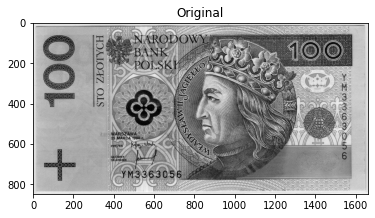

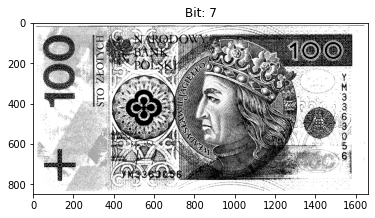

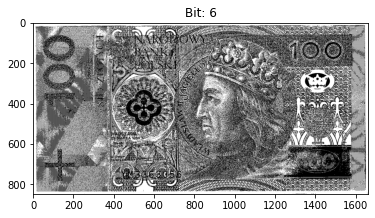

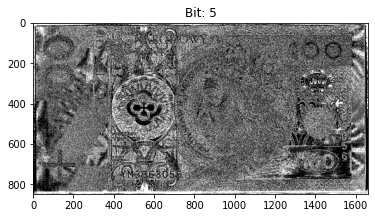

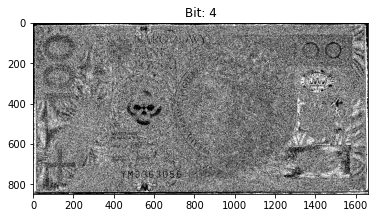

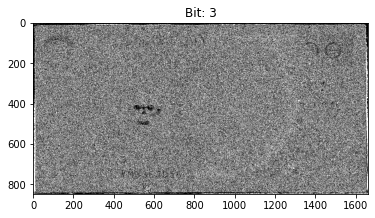

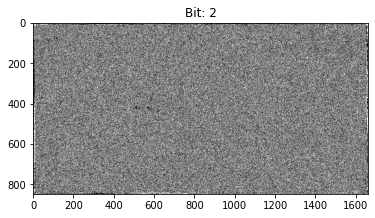

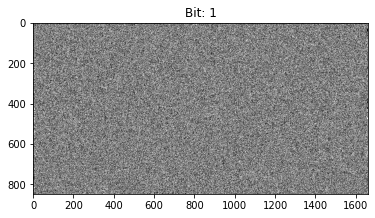

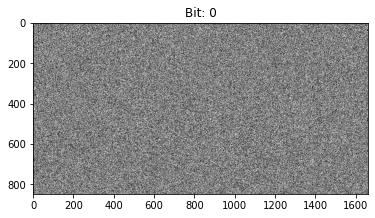

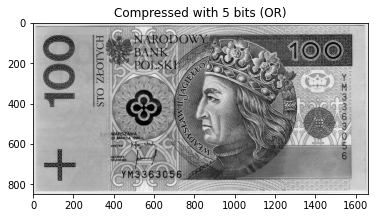

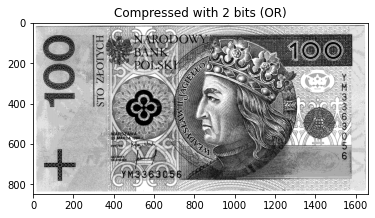

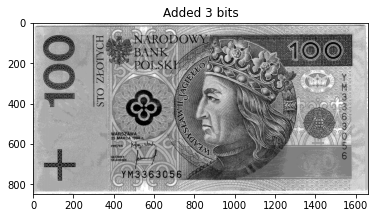

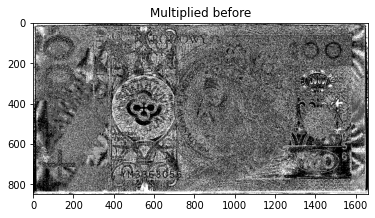

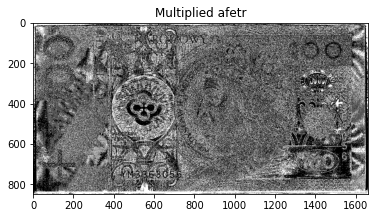

In [1]:
from numpy.ma.core import compressed
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)


zloty=cv2.imread(fileName)
zloty=cv2.cvtColor(zloty,cv2.COLOR_BGR2GRAY)
plt.imshow(zloty,"gray")
plt.title("Original")
plt.show()
bitPlanezlotys=[]

bitAnd = lambda x,bit: x & bit
bitOr = lambda x,bit: x | bit
for i in range(7,-1,-1):
  newZloty=bitAnd(zloty,2**i)
  bitPlanezlotys.append(newZloty)
  plt.imshow(newZloty,"gray")
  plt.title("Bit: "+str(i))
  plt.show()

compressedZloty=bitPlanezlotys[0]
for i in range(1,5):
  compressedZloty=compressedZloty|bitPlanezlotys[i]

plt.imshow(compressedZloty,"gray")
plt.title("Compressed with 5 bits (OR)")
plt.show()

compressedZloty=bitPlanezlotys[0]
for i in range(1,2):
  compressedZloty=compressedZloty|bitPlanezlotys[i]

plt.imshow(compressedZloty,"gray")
plt.title("Compressed with 2 bits (OR)")
plt.show()

addedZloty=cv2.add(bitPlanezlotys[0].astype('uint16'),bitPlanezlotys[1].astype('uint16'))
addedZloty=addedZloty/2
addedZloty=cv2.add(addedZloty.astype('uint16'),bitPlanezlotys[2].astype('uint16'))
addedZloty=addedZloty/2
addedZloty=addedZloty.astype('uint8')
plt.imshow(addedZloty,"gray")
plt.title("Added 3 bits")
plt.show()

multipliedZloty=bitPlanezlotys[2]
multipliedZloty=cv2.multiply(multipliedZloty,2**4)
# multipliedZloty=multipliedZloty/255 


plt.imshow(bitPlanezlotys[2],"gray")
plt.title("Multiplied before")
plt.show()
plt.imshow(multipliedZloty,"gray")
plt.title("Multiplied afetr")
plt.show()
  


